<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula04b_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
dataset = load_wine()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


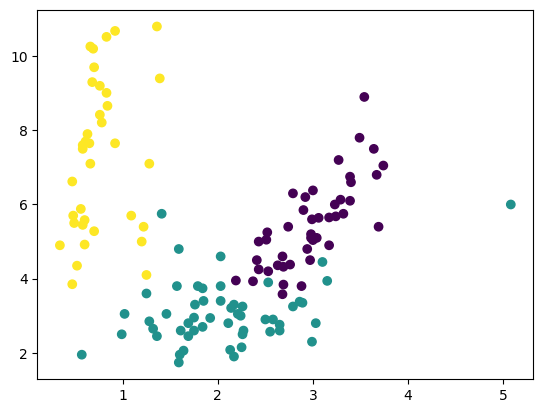

In [69]:
import matplotlib.pyplot as plt

def plot_dataset(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y)

feats = [6, 9]
_ = plot_dataset(X_train[:, feats], y_train)

In [70]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report

class K1nnClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def distance_(self, x):
        return np.sum((self.X_train - x)**2, axis=1)

    def predict(self, X):
        y_pred = np.empty((X.shape[0],))
        for i, x in enumerate(X):
            distances = self.distance_(x)
            min_index = np.argmin(distances)
            y_pred[i] = self.y_train[min_index]
        return y_pred

model = K1nnClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.87      0.72      0.79        18
           2       0.69      0.75      0.72        12

    accuracy                           0.78        45
   macro avg       0.77      0.78      0.77        45
weighted avg       0.79      0.78      0.78        45



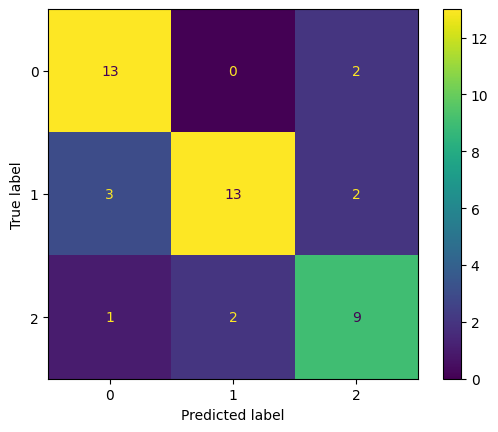

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
_ = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [72]:
def defineAxes(X):
    offset = 0.1
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plotPredictions(clf, X):
    axes = defineAxes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        36

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133



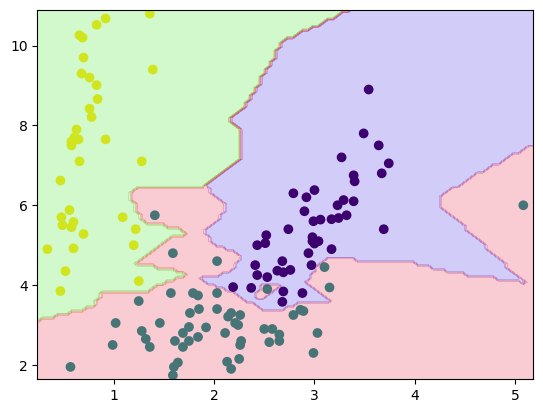

In [73]:
model = K1nnClassifier()
model.fit(X_train[:, feats], y_train)
_ = plot_dataset(X_train[:, feats], y_train)
plotPredictions(model, X_train[:, feats])
print(classification_report(y_train, model.predict(X_train[:, feats])))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.89      0.94        18
           2       1.00      1.00      1.00        12

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



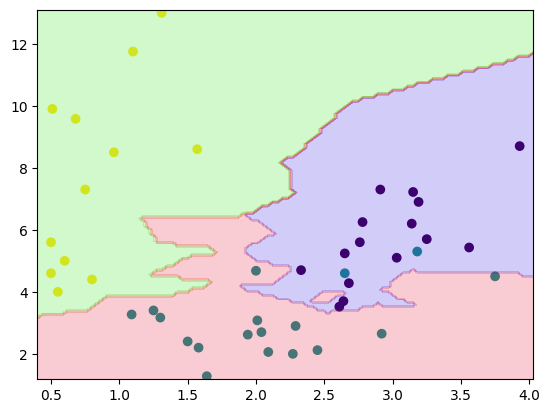

In [74]:
_ = plot_dataset(X_test[:, feats], y_test)
plotPredictions(model, X_test[:, feats])
print(classification_report(y_test, model.predict(X_test[:, feats])))

In [75]:
from sklearn.model_selection import cross_validate
from pprint import pprint

scores = cross_validate(model, X, y, cv=5)
pprint(scores)
print(scores['test_score'].mean())

{'fit_time': array([0.00039411, 0.00016451, 0.00011849, 0.00014782, 0.00011945]),
 'score_time': array([0.00495172, 0.00130153, 0.00119519, 0.00115585, 0.0011456 ]),
 'test_score': array([0.80555556, 0.80555556, 0.55555556, 0.8       , 0.2       ])}
0.6333333333333334


In [76]:
from sklearn.neighbors import KNeighborsClassifier
scores = cross_validate(KNeighborsClassifier(), X, y, cv=5)
pprint(scores)
print(scores['test_score'].mean())

{'fit_time': array([0.00109673, 0.00103188, 0.00092077, 0.00093293, 0.00092101]),
 'score_time': array([0.00242233, 0.00218558, 0.00258803, 0.00209689, 0.00213814]),
 'test_score': array([0.72222222, 0.66666667, 0.63888889, 0.65714286, 0.77142857])}
0.6912698412698413


In [77]:
from sklearn.neighbors import KNeighborsClassifier
scores = cross_validate(KNeighborsClassifier(), X[:,feats], y, cv=5)
pprint(scores)
print(scores['test_score'].mean())

{'fit_time': array([0.00188279, 0.00087881, 0.00108552, 0.00083804, 0.00084043]),
 'score_time': array([0.00225663, 0.00237513, 0.00215793, 0.00197268, 0.00188303]),
 'test_score': array([0.80555556, 0.88888889, 0.86111111, 1.        , 0.94285714])}
0.8996825396825396


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
### ERRADO ###
X_scaled = scaler.fit_transform(X)
scores = cross_validate(KNeighborsClassifier(), X_scaled, y, cv=5)
### ### ### ###
pprint(scores)
print(scores['test_score'].mean())

{'fit_time': array([0.00094962, 0.0009017 , 0.00101209, 0.00109363, 0.00103354]),
 'score_time': array([0.00230074, 0.0021255 , 0.00220346, 0.00287414, 0.00230384]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.91428571])}
0.9550793650793651


In [99]:
random_state = 41

In [100]:
### ERRADO ###
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=random_state)
### ### ### ###
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.87      0.90        15
           2       0.94      0.94      0.94        18

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.93      0.93      0.93        45



In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)
model = KNeighborsClassifier()
### CORRETO ###
X_train_scaled = scaler.fit_transform(X_train)
model.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)
### ### ### ###
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        15
           2       1.00      0.94      0.97        18

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [102]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(StandardScaler(), KNeighborsClassifier())
scores = cross_validate(model, X, y, cv=5)
pprint(scores)
print(scores['test_score'].mean())

{'fit_time': array([0.00392628, 0.00255108, 0.00239587, 0.00239205, 0.0022192 ]),
 'score_time': array([0.0040586 , 0.00318217, 0.00308323, 0.00313687, 0.00310016]),
 'test_score': array([0.94444444, 0.94444444, 0.97222222, 1.        , 0.88571429])}
0.9493650793650794
